# COVID-19 CT scans
> Use of Lung CT scans to create prediction models that indicate the presence of COVID-19 infections

CT scans plays a supportive role in the diagnosis of COVID-19 and is a key procedure for determining the severity that the patient finds himself in.
Models that can find evidence of COVID-19 and/or characterize its findings can play a crucial role in optimizing diagnosis and treatment, especially in areas with a shortage of expert radiologists.
This dataset contains 20 CT scans of patients diagnosed with COVID-19 as well as segmentations of lungs and infections made by experts.

In [62]:
import glob 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [41]:
# As the raw data files are in the *.nii format we need to import the nibabel 
import nibabel as nib 

In [42]:
import os
cwd = os.getcwd()
print(cwd)

/Users/arcadekwaku/A.Code/fast_pages_datascience/_notebooks


Within the dataset provided by kaggle there is a a metadata csv file which provides all of the file paths for sub directories.

In [43]:
raw_df = pd.read_csv('input/covid19-ct-scans/metadata.csv')

In [44]:
#The metadata csv file contains all of the file paths for each of the CT images within the dataset provided by kaggle. 
# Loading the data frame head to get an ouline of the data.
raw_df.head()

,ct_scan,lung_mask,infection_mask,lung_and_infection_mask
0,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
1,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
2,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
3,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
4,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...


First, to ensure we're able to load each image file by reading the file path and using the nibel package to load the data. 

In [50]:
#select the first file path in the first column
first_scan = raw_df['ct_scan'][0]
print(first_scan)

input/covid19-ct-scans/ct_scans/coronacases_org_001.nii


In [48]:
# As all the data has the "../" prefix in the dataframe this cause in an error with loading it.
# Use of a lambda function to strip this from the front of the string
raw_df['ct_scan'] = raw_df['ct_scan'].map(lambda x: x.lstrip('../').rstrip('aAbBcC'))

In [51]:
print(first_scan)

input/covid19-ct-scans/ct_scans/coronacases_org_001.nii


In [52]:
ct_scan = nib.load(first_scan)

In [53]:
array = ct_scan.get_fdata()

In [64]:
# refactor the above code into a function:
def read_nii(filepath):
    '''
    Reads .nii file and returns pixel array
    '''
    ct_scan = nib.load(filepath)
    ct_array   = ct_scan.get_fdata()
    ct_array = ct_array.T
    # Return an image using maplot lib 
    return plt.imshow(ct_array[200])

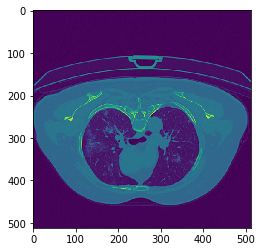

In [65]:
read_nii(first_scan)